# 1. Data manipulation and cleansing

In [1]:
import numpy as np  #load necessary library
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
!pip install countryinfo

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Processing /home/jovyan/.cache/pip/wheels/fd/3a/dd/d57a9e691c7e2f1015fe85d1a61616fc0820517432caf08c34/countryinfo-0.1.0-py3-none-any.whl


In [3]:
from countryinfo import CountryInfo

In [62]:
country_code = pd.read_csv("country_codes.csv")  #read the csv file to dataframe
population_figures = pd.read_csv("population-figures-by-country-csv_csv.csv",index_col="Country")
confirmed_case = pd.read_csv("time_series_covid19_confirmed_global.csv",index_col="Country/Region",parse_dates=True)
deaths_case = pd.read_csv("time_series_covid19_deaths_global.csv",index_col="Country/Region",parse_dates=True)
recovered_case = pd.read_csv("time_series_covid19_recovered_global.csv",index_col="Country/Region",parse_dates=True)

In [63]:
confirmed_case.info() #check the null value

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, Afghanistan to Yemen
Data columns (total 96 columns):
Province/State    82 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/11/20           264 non-null in

In [64]:
confirmed_case.fillna("Not Specified", inplace = True) #fill in  the null value
deaths_case.fillna("Not Specified", inplace = True)
recovered_case.fillna("Not Specified", inplace = True)

In [65]:
confirmed_case.info() #check again

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, Afghanistan to Yemen
Data columns (total 96 columns):
Province/State    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/11/20           264 non-null i

In [66]:
confirmed_case=confirmed_case.drop(index=["Diamond Princess","MS Zaandam"]) #drop the cruise ship which isn't a country
deaths_case=deaths_case.drop(index=["Diamond Princess","MS Zaandam"])
recovered_case=recovered_case.drop(index=["Diamond Princess","MS Zaandam"])

In [67]:
confirmed_cases_per_day = confirmed_case.iloc[:,3:].groupby(confirmed_case.index).sum() #sum up the number of case grouped by each country
death_cases_per_day = deaths_case.iloc[:,3:].groupby(deaths_case.index).sum()
recov_cases_per_day = recovered_case.iloc[:,3:].groupby(recovered_case.index).sum()

In [68]:
confirmed_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
Albania,0,0,0,0,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
Algeria,0,0,0,0,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
Andorra,0,0,0,0,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,308,374,374,402,418,437,449,466,474,480
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [69]:
death_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,23,25,30,30,30,33,36,36,40,42
Albania,0,0,0,0,0,0,0,0,0,0,...,24,25,26,26,26,26,26,26,27,27
Algeria,0,0,0,0,0,0,0,0,0,0,...,326,336,348,364,367,375,384,392,402,407
Andorra,0,0,0,0,0,0,0,0,0,0,...,31,33,33,35,35,36,37,37,37,37
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,3,3,4,4,4
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
recov_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
Albania,0,0,0,0,0,0,0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
Algeria,0,0,0,0,0,0,0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
Andorra,0,0,0,0,0,0,0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
Angola,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,62,63,63,69,69,71,71,71,71,92
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Descriptive analysis and initial data exploration


## a. How many countries have reported at least 10 cases?

In [71]:
confirmed_cases_per_day["4/23/20"] # the total number number of comfirmed case of each country till 4/23/20

Country/Region
Afghanistan           1279
Albania                663
Algeria               3007
Andorra                723
Angola                  25
                      ... 
West Bank and Gaza     480
Western Sahara           6
Yemen                    1
Zambia                  76
Zimbabwe                28
Name: 4/23/20, Length: 183, dtype: int64

In [72]:
At_least_10 = confirmed_cases_per_day[confirmed_cases_per_day["4/23/20"] >= 10]["4/23/20"]
At_least_10.shape[0]

175

The are 175 countries have reported at least 10 cases among 185 countries.

## b. Which are the five countries with the highest number of active cases?

In [73]:
activecase = confirmed_cases_per_day["4/23/20"]-recov_cases_per_day["4/23/20"]-death_cases_per_day["4/23/20"] #active case = confirmed case - death case -recovery case
activecase

Country/Region
Afghanistan           1058
Albania                251
Algeria               1245
Andorra                353
Angola                  17
                      ... 
West Bank and Gaza     384
Western Sahara           1
Yemen                    1
Zambia                  36
Zimbabwe                22
Name: 4/23/20, Length: 183, dtype: int64

In [74]:
activecase.sort_values(axis=0,ascending=False).head(5)

Country/Region
US                739013
United Kingdom    119743
Italy             106848
Spain             101617
France             94809
Name: 4/23/20, dtype: int64

US ,United Kingdom ,Italy,Spain  and France have the highest number of active cases.

## c. What is the current rate of increase in the total number of cases, based on the last week of data?

In [75]:
total_case_per_day=confirmed_cases_per_day.sum(axis=0)
last_week = total_case_per_day[-7:] # the total number of cases on the last week of data
last_week

4/17/20    2239469
4/18/20    2317037
4/19/20    2400380
4/20/20    2471537
4/21/20    2548401
4/22/20    2623368
4/23/20    2708163
dtype: int64

In [76]:
last_week.diff(1) # the increase of number of case per day


4/17/20        NaN
4/18/20    77568.0
4/19/20    83343.0
4/20/20    71157.0
4/21/20    76864.0
4/22/20    74967.0
4/23/20    84795.0
dtype: float64

In [77]:
last_week.diff(1).mean(skipna=True) # the average increase of number of case per day

78115.66666666667

The current rate of increase in the total number of cases is 78116 cases/day, based on the last week of data.

# 3. Data normalisation

## a.Normalising the number of case by the population of the countries

In [79]:
Country = confirmed_cases_per_day.index  #get the popluation of each countries
population= []
for i in Country:
    try:
        country = CountryInfo(i)
        population.append(country.population())
    except KeyError:
        population.append(None)

In [80]:
country_population = pd.DataFrame(
    {
     'population': population,
     
    })
country_population.index=confirmed_cases_per_day.index
country_population

,population
Country/Region,
Afghanistan,26023100.0
Albania,2895947.0
Algeria,38700000.0
Andorra,NaN
Angola,24383301.0
...,...
West Bank and Gaza,NaN
Western Sahara,586000.0
Yemen,25956000.0


In [81]:
null_country_population = pd.isnull(country_population["population"]) #check which countries has the na values
country_population[null_country_population].to_csv("null.csv")
country_population[null_country_population]

,population
Country/Region,
Andorra,NaN
Bahamas,NaN
Burma,NaN
Cabo Verde,NaN
Congo (Brazzaville),NaN
Congo (Kinshasa),NaN
Cote d'Ivoire,NaN
Czechia,NaN
Eswatini,NaN


In [82]:
remedial = pd.read_csv("nulllist.csv",index_col = "Country/Region") #a remedial of population of each countries 
remedial

,population
Country/Region,
Andorra,77010
Bahamas,385600
Burma,53710000
Cabo Verde,543800
Congo (Brazzaville),5244000
Congo (Kinshasa),84070000
Cote d'Ivoire,25070000
Czechia,10650000
Diamond Princess,"2,666"


In [83]:
country_population = country_population.fillna(remedial) #fill in with the remedial
country_population

,population
Country/Region,
Afghanistan,2.60231e+07
Albania,2.89595e+06
Algeria,3.87e+07
Andorra,77010
Angola,2.43833e+07
...,...
West Bank and Gaza,4569000
Western Sahara,586000
Yemen,2.5956e+07


In [84]:
confirmed_cases_per_day=confirmed_cases_per_day.astype(float) #change the type of value into float to make calculation
country_population["population"]=country_population["population"].astype(float)


In [85]:
normalised_confirmed_cases_per_day = confirmed_cases_per_day.div(country_population.values)*1000000 #normalised by the population of countries,and then convert it into unit of ppm and take log
normalised_confirmed_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.437162,30.127079,32.279014,34.815222,35.852762,38.273688,39.426510,41.962718,45.190619,49.148641
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,164.022339,170.583232,178.870677,186.122191,189.229982,194.064325,201.661149,210.293904,218.926659,228.940654
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.488372,55.813953,58.604651,62.480620,65.478036,67.932817,70.232558,72.635659,75.193798,77.700258
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8557.330217,8739.124789,8739.124789,9037.787300,9141.669913,9258.537852,9310.479159,9310.479159,9388.391118,9388.391118
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.779222,0.779222,0.779222,0.779222,0.984280,0.984280,0.984280,0.984280,1.025292,1.025292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.410812,81.855986,81.855986,87.984242,91.486102,95.644561,98.270956,101.991683,103.742613,105.055811
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.238908,10.238908,10.238908,10.238908,10.238908,10.238908,10.238908,10.238908,10.238908,10.238908
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038527,0.038527,0.038527,0.038527,0.038527,0.038527,0.038527,0.038527,0.038527,0.038527


In [86]:
normalised_death_cases_per_day= death_cases_per_day.div(country_population.values)*1000000
normalised_death_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.883830,0.960685,1.152822,1.152822,1.152822,1.268104,1.383386,1.383386,1.537096,1.613951
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.287444,8.632755,8.978065,8.978065,8.978065,8.978065,8.978065,8.978065,9.323375,9.323375
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.423773,8.682171,8.992248,9.405685,9.483204,9.689922,9.922481,10.129199,10.387597,10.516796
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,402.545124,428.515777,428.515777,454.486430,454.486430,467.471757,480.457083,480.457083,480.457083,480.457083
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082023,0.082023,0.082023,0.082023,0.082023,0.082023,0.082023,0.082023,0.082023,0.082023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.437733,0.437733,0.437733,0.437733,0.437733,0.656599,0.656599,0.875465,0.875465,0.875465
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
normalised_recov_cases_per_day= recov_cases_per_day.div(country_population.values)*1000000
normalised_recov_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.537096,1.652378,2.075079,3.804312,4.303868,5.033989,5.187699,5.764110,6.378948,6.878504
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.636926,86.672857,95.650922,97.722783,104.283676,108.427399,112.916431,119.132015,122.930427,132.944422
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.855297,18.294574,20.232558,21.860465,23.100775,27.054264,28.397933,29.767442,31.111111,35.012920
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1662.121802,2194.520192,2194.520192,2480.197377,2661.991949,3051.551747,3220.360992,3661.862096,4012.465914,4324.113751
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.205058,0.205058,0.205058,0.205058,0.246070,0.246070,0.246070,0.246070,0.246070,0.246070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.569709,13.788575,13.788575,15.101773,15.101773,15.539505,15.539505,15.539505,15.539505,20.135697
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.532423
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## b. set the day that reaches or exceeds 10 confirmed cases as 'day 0' of the outbreak.

In [88]:
removedlessthanten_confirmed_cases_per_day = confirmed_cases_per_day.apply(lambda x: [y if y >= 10 else 0 for y in x]) ## replace the confirmed number less than 10 by 0
## so when a day has confirmed number >0, that day is the 'day 0' of the outbreak.
removedlessthanten_confirmed_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,714.0,784.0,840.0,906.0,933.0,996.0,1026.0,1092.0,1176.0,1279.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475.0,494.0,518.0,539.0,548.0,562.0,584.0,609.0,634.0,663.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2070.0,2160.0,2268.0,2418.0,2534.0,2629.0,2718.0,2811.0,2910.0,3007.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,659.0,673.0,673.0,696.0,704.0,713.0,717.0,717.0,723.0,723.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,19.0,19.0,19.0,24.0,24.0,24.0,24.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,308.0,374.0,374.0,402.0,418.0,437.0,449.0,466.0,474.0,480.0
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Further data exploration

### a) For any given territory, the total number of confirmed cases should only increase (apart from reporting errors). This is not true for the number of active cases. Based on the available data, which regions or countries seem to have passed the peak of their local outbreak?

Let define the peak as the day that has most active case
When the countries seem to have passed the peak of their local outbreak,the active case drop.

In [89]:
activecases_per_day = removedlessthanten_confirmed_cases_per_day-recov_cases_per_day-death_cases_per_day #active case = confirmed case - death case -recovery case
increase_of_activecases_per_day = activecases_per_day.diff(axis=1)
last_week_increase_of_activecases_per_day=increase_of_activecases_per_day.iloc[:,-7:] 
last_week_increase_of_activecases_per_day_mean = last_week_increase_of_activecases_per_day.mean(axis=1).reset_index(name='mean')
last_week_increase_of_activecases_per_day_mean

,Country/Region,mean
0,Afghanistan,43.142857
1,Albania,5.142857
2,Algeria,15.428571
3,Andorra,-16.857143
4,Angola,0.714286
...,...,...
178,West Bank and Gaza,10.714286
179,Western Sahara,-0.714286
180,Yemen,0.000000
181,Zambia,2.857143


In [90]:
countries_passed_peak = last_week_increase_of_activecases_per_day_mean[last_week_increase_of_activecases_per_day_mean['mean'] <0]
countries_passed_peak #these countries with average increase of active case <=0 in the last week seem to have passed the peak of their local outbreak

,Country/Region,mean
3,Andorra,-16.857143
5,Antigua and Barbuda,-0.857143
8,Australia,-226.000000
9,Austria,-327.714286
10,Azerbaijan,-32.571429
14,Barbados,-2.142857
17,Belize,-0.714286
19,Bhutan,-0.142857
24,Brunei,-1.285714
26,Burkina Faso,-13.142857


## b) What can you say about how long it takes for the outbreak to peak?


In [91]:
peak_vs_dayone = removedlessthanten_confirmed_cases_per_day.idxmax(axis=1).reset_index(name="peak")
peak_vs_dayone= peak_vs_dayone[peak_vs_dayone['Country/Region'].isin(countries_passed_peak["Country/Region"])]
filtered_removedlessthanten_confirmed_cases_per_day= removedlessthanten_confirmed_cases_per_day[removedlessthanten_confirmed_cases_per_day.index.isin(countries_passed_peak["Country/Region"])]
peak_vs_dayone=peak_vs_dayone.reset_index(drop=True)
peak_vs_dayone   # find the day of peck

,Country/Region,peak
0,Andorra,4/22/20
1,Antigua and Barbuda,4/22/20
2,Australia,4/23/20
3,Austria,4/23/20
4,Azerbaijan,4/23/20
5,Barbados,4/23/20
6,Belize,4/13/20
7,Bhutan,1/22/20
8,Brunei,4/19/20
9,Burkina Faso,4/23/20


In [92]:
countrylist= peak_vs_dayone['Country/Region'].astype(str)
countrylist.values

array(['Andorra', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Barbados', 'Belize', 'Bhutan', 'Brunei',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Central African Republic',
       'China', 'Costa Rica', 'Croatia', 'Czechia', 'Denmark', 'Dominica',
       'Eritrea', 'Fiji', 'France', 'Germany', 'Greece', 'Grenada',
       'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Jordan',
       'Korea, South', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Madagascar',
       'Malaysia', 'Malta', 'Mauritania', 'Mauritius', 'Monaco',
       'Montenegro', 'Namibia', 'New Zealand', 'Niger', 'Rwanda',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Seychelles',
       'Switzerland', 'Taiwan*', 'Thailand', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Uganda', 'Uruguay',
       'Uzbekistan', 'Vietnam', 'Western Sahara'], dtype=object)

In [93]:
abc = removedlessthanten_confirmed_cases_per_day.transpose()
dayone = []
for i in countrylist.values:
    dayone.append(abc[abc[i]>=10].first_valid_index())
dayone
#find the first day that outbreak

['3/17/20',
 '4/3/20',
 '2/1/20',
 '3/1/20',
 '3/10/20',
 '3/22/20',
 '4/10/20',
 None,
 '3/11/20',
 '3/16/20',
 '3/17/20',
 '3/17/20',
 '4/13/20',
 '1/22/20',
 '3/11/20',
 '3/4/20',
 '3/5/20',
 '3/4/20',
 '3/26/20',
 '3/29/20',
 '4/4/20',
 '2/8/20',
 '2/2/20',
 '3/5/20',
 '4/2/20',
 '3/3/20',
 '2/21/20',
 '2/29/20',
 '3/6/20',
 '3/1/20',
 '3/16/20',
 '1/31/20',
 '3/21/20',
 '4/1/20',
 '3/1/20',
 '3/23/20',
 '2/4/20',
 '3/13/20',
 None,
 '3/20/20',
 '3/20/20',
 '3/20/20',
 '3/29/20',
 '3/17/20',
 '3/26/20',
 '3/20/20',
 '3/31/20',
 '4/9/20',
 '3/31/20',
 '2/29/20',
 '1/31/20',
 '1/28/20',
 '3/21/20',
 '3/21/20',
 '3/13/20',
 '3/25/20',
 '3/17/20',
 '3/17/20',
 '2/6/20',
 None]

In [94]:
peak_vs_dayone["dayone"]=dayone
peak_vs_dayone

,Country/Region,peak,dayone
0,Andorra,4/22/20,3/17/20
1,Antigua and Barbuda,4/22/20,4/3/20
2,Australia,4/23/20,2/1/20
3,Austria,4/23/20,3/1/20
4,Azerbaijan,4/23/20,3/10/20
5,Barbados,4/23/20,3/22/20
6,Belize,4/13/20,4/10/20
7,Bhutan,1/22/20,None
8,Brunei,4/19/20,3/11/20
9,Burkina Faso,4/23/20,3/16/20


In [95]:
droppedna_peak_vs_dayone = peak_vs_dayone.dropna()
droppedna_peak_vs_dayone["peak"] = pd.to_datetime(droppedna_peak_vs_dayone["peak"])
droppedna_peak_vs_dayone["dayone"] = pd.to_datetime(droppedna_peak_vs_dayone["dayone"])
droppedna_peak_vs_dayone["dayone_to_peak"] = droppedna_peak_vs_dayone["peak"] - droppedna_peak_vs_dayone["dayone"]
droppedna_peak_vs_dayone

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Country/Region,peak,dayone,dayone_to_peak
0,Andorra,2020-04-22,2020-03-17,36 days
1,Antigua and Barbuda,2020-04-22,2020-04-03,19 days
2,Australia,2020-04-23,2020-02-01,82 days
3,Austria,2020-04-23,2020-03-01,53 days
4,Azerbaijan,2020-04-23,2020-03-10,44 days
5,Barbados,2020-04-23,2020-03-22,32 days
6,Belize,2020-04-13,2020-04-10,3 days
8,Brunei,2020-04-19,2020-03-11,39 days
9,Burkina Faso,2020-04-23,2020-03-16,38 days
10,Cambodia,2020-04-12,2020-03-17,26 days


In [96]:
droppedna_peak_vs_dayone["dayone_to_peak"].mean()

Timedelta('41 days 02:31:34.736842')

The mean of time takes from dayone to peak is 41 days.

## The dataset does not contain any information at the level of individual cases. However, based on the available data, can you estimate how long it takes patient to recover? Does this vary by region or country? How confident can you be about these results?

Assumption: The recovery time = the day one that confirmed case is found - the day one that recovery case is found

In [97]:
list_At_least_10=At_least_10.index.tolist()


In [98]:
transposed_confirmed_cases_per_day = confirmed_cases_per_day.transpose()
transposed_confirmed_cases_per_day

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,996.0,562.0,2629.0,713.0,24.0,23.0,2839.0,1291.0,6547.0,14749.0,...,121172.0,517.0,1565.0,256.0,268.0,437.0,6.0,1.0,61.0,25.0
4/20/20,1026.0,584.0,2718.0,717.0,24.0,23.0,2941.0,1339.0,6547.0,14795.0,...,125856.0,535.0,1627.0,256.0,268.0,449.0,6.0,1.0,65.0,25.0
4/21/20,1092.0,609.0,2811.0,717.0,24.0,23.0,3031.0,1401.0,6547.0,14873.0,...,130172.0,535.0,1678.0,285.0,268.0,466.0,6.0,1.0,70.0,28.0
4/22/20,1176.0,634.0,2910.0,723.0,25.0,24.0,3144.0,1473.0,6547.0,14925.0,...,134638.0,543.0,1716.0,288.0,268.0,474.0,6.0,1.0,74.0,28.0


In [99]:

comfirmed_dayone = [] 
for i in list_At_least_10:
    comfirmed_dayone.append(transposed_confirmed_cases_per_day[transposed_confirmed_cases_per_day[i]>0].first_valid_index())


In [100]:
transposed_recov_cases_per_day = recov_cases_per_day.transpose()

recov_dayone = []
for i in list_At_least_10:
    recov_dayone.append(transposed_recov_cases_per_day[transposed_recov_cases_per_day[i]>0].first_valid_index())

In [101]:
recov_vs_confirmed = pd.DataFrame(list(zip(list_At_least_10, comfirmed_dayone, recov_dayone)), columns = ['country' , 'comfirmed_dayone', 'recov_dayone']) 
recov_vs_confirmed

,country,comfirmed_dayone,recov_dayone
0,Afghanistan,2/24/20,3/16/20
1,Albania,3/9/20,3/21/20
2,Algeria,2/25/20,3/12/20
3,Andorra,3/2/20,3/12/20
4,Angola,3/20/20,3/31/20
...,...,...,...
170,Venezuela,3/14/20,3/22/20
171,Vietnam,1/23/20,2/1/20
172,West Bank and Gaza,3/5/20,3/20/20
173,Zambia,3/18/20,4/3/20


In [102]:
recov_vs_confirmed["comfirmed_dayone"] = pd.to_datetime(recov_vs_confirmed["comfirmed_dayone"])
recov_vs_confirmed["recov_dayone"] = pd.to_datetime(recov_vs_confirmed["recov_dayone"])
recov_vs_confirmed["day_to_recover"] = recov_vs_confirmed["recov_dayone"] - recov_vs_confirmed["comfirmed_dayone"]
recov_vs_confirmed

,country,comfirmed_dayone,recov_dayone,day_to_recover
0,Afghanistan,2020-02-24,2020-03-16,21 days
1,Albania,2020-03-09,2020-03-21,12 days
2,Algeria,2020-02-25,2020-03-12,16 days
3,Andorra,2020-03-02,2020-03-12,10 days
4,Angola,2020-03-20,2020-03-31,11 days
...,...,...,...,...
170,Venezuela,2020-03-14,2020-03-22,8 days
171,Vietnam,2020-01-23,2020-02-01,9 days
172,West Bank and Gaza,2020-03-05,2020-03-20,15 days
173,Zambia,2020-03-18,2020-04-03,16 days


In [103]:
recov_vs_confirmed["day_to_recover"].describe()

count                        174
mean     15 days 02:37:14.482758
std       6 days 08:10:18.791361
min              0 days 00:00:00
25%             11 days 00:00:00
50%             15 days 00:00:00
75%             18 days 18:00:00
max             38 days 00:00:00
Name: day_to_recover, dtype: object

It take 15 days for a patient to recover. The standard deviation is 6 days so it does vary country.
The figure is underestimated because it assumes that the first confirmed case and the first recover case is the same case. 


## Mitigation strategies are aimed at 'flattening' the outbreak, to reduce the strain on the health system. We discuss this in more details in the concluding remarks below. For countries or regions that are far enough into their local outbreak, consider the number of active cases relative to the number of confirmed cases. Can you say anything about the effectiveness of their mitigation strategies?

In [104]:
list_countries_passed_peak = countries_passed_peak["Country/Region"].tolist()


In [105]:
ratio_active_case_to_confirm_case = (normalised_confirmed_cases_per_day-normalised_recov_cases_per_day-normalised_death_cases_per_day)/normalised_confirmed_cases_per_day
ratio_active_case_to_confirm_case.to_csv("sds.csv")

In [106]:
transposed_ratio_active_case_to_confirm_case = ratio_active_case_to_confirm_case.transpose()
dayone_of_1 = []  #take the day when ratio of active case to confirm case equal to one
for i in list_countries_passed_peak:  
    dayone_of_1.append(transposed_ratio_active_case_to_confirm_case[transposed_ratio_active_case_to_confirm_case[i]==1].first_valid_index())
    
dayone_of_08 = []
for i in list_countries_passed_peak: #take the day when ratio of active case to confirm case less than to 0.8
    dayone_of_08.append(transposed_ratio_active_case_to_confirm_case[transposed_ratio_active_case_to_confirm_case[i]<0.8].first_valid_index())
day_from_1_to_08 = pd.DataFrame(list(zip(list_countries_passed_peak, dayone_of_1, dayone_of_08)), columns = ['country' , 'dayone_of_1', 'dayone_of_08']) 
day_from_1_to_08

,country,dayone_of_1,dayone_of_08
0,Andorra,3/2/20,3/12/20
1,Antigua and Barbuda,3/13/20,4/14/20
2,Australia,1/26/20,1/30/20
3,Austria,2/25/20,4/4/20
4,Azerbaijan,3/1/20,3/11/20
5,Barbados,3/17/20,4/9/20
6,Belize,3/23/20,4/10/20
7,Bhutan,3/6/20,4/3/20
8,Brunei,3/9/20,3/28/20
9,Burkina Faso,3/10/20,4/1/20


In [107]:
day_from_1_to_08["dayone_of_1"] = pd.to_datetime(day_from_1_to_08["dayone_of_1"])
day_from_1_to_08["dayone_of_08"] = pd.to_datetime(day_from_1_to_08["dayone_of_08"])
day_from_1_to_08["day_from_1_to_08"] = day_from_1_to_08["dayone_of_08"] - day_from_1_to_08["dayone_of_1"]
day_from_1_to_08.sort_values(by='day_from_1_to_08', ascending=True) #take the difference

,country,dayone_of_1,dayone_of_08,day_from_1_to_08
51,Thailand,2020-01-22,2020-01-26,4 days
2,Australia,2020-01-26,2020-01-30,4 days
29,Israel,2020-02-21,2020-02-27,6 days
0,Andorra,2020-03-02,2020-03-12,10 days
4,Azerbaijan,2020-03-01,2020-03-11,10 days
42,Namibia,2020-03-14,2020-03-24,10 days
30,Jordan,2020-03-03,2020-03-13,10 days
46,Saint Lucia,2020-03-14,2020-03-27,13 days
47,Saint Vincent and the Grenadines,2020-03-14,2020-03-28,14 days
38,Mauritania,2020-03-14,2020-03-29,15 days


Thailand and Austalia had locked down very soon so the could lower their active case ratio from 1 to 0.8 in short time.

## In epidemiology, the case fatality rate (CFR) is the ratio of deaths from a certain disease to the total number of people diagnosed with this disease. The formula is straight-foward once an epidemic has ended. However, while an epidemic is still ongoing, as it is the case with the COVID-19 outbreak, this formula can be "misleading if, at the time of analysis, the outcome is unknown for a non negligible proportion of patients." One alternative is to estimate CFR as deaths / (deaths + recovered). What kind of assumptions is that making? If you use this formula, what range of values do you get? Does this vary over time?

It assumes that the total number of people diagnosed equal to deaths + recovered.

In [108]:
CFR = (normalised_death_cases_per_day)/(normalised_death_cases_per_day+normalised_recov_cases_per_day)
CFR

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.365079,0.367647,0.357143,0.232558,0.211268,0.201220,0.210526,0.193548,0.194175,0.190045
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.088235,0.090580,0.085809,0.084142,0.079268,0.076471,0.073654,0.070081,0.070496,0.065534
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.320551,0.321839,0.307692,0.300826,0.291039,0.263713,0.258935,0.253886,0.250311,0.230988
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194969,0.163366,0.163366,0.154867,0.145833,0.132841,0.129825,0.115987,0.106936,0.100000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.285714,0.285714,0.285714,0.285714,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031250,0.030769,0.030769,0.028169,0.028169,0.040541,0.040541,0.053333,0.053333,0.041667
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
CFR.min().sort_values() #take the min


3/8/20     0.000000
3/28/20    0.000000
3/27/20    0.000000
3/26/20    0.000000
3/25/20    0.000000
             ...   
2/25/20    0.000000
1/23/20    0.375000
1/22/20    0.377778
1/24/20    0.419355
1/25/20    0.518519
Length: 93, dtype: float64

In [52]:
CFR.max().sort_values() #take the max

1/23/20    0.375000
1/22/20    0.377778
1/24/20    0.419355
2/1/20     0.485019
1/31/20    0.498829
             ...   
3/6/20     1.000000
3/5/20     1.000000
3/4/20     1.000000
3/10/20    1.000000
4/23/20    1.000000
Length: 93, dtype: float64

The range of CFR is from 0 to 1 .The CFR of each countryies was decreasing over time

## With a disease like COVID-19 where the vast majority of cases are mild or even asymptomatic, the number of confirmed cases is going to be highly dependent on the testing strategy. Do you see any relationship between the number of cases and your estimated CFR values?

In [53]:
Aus_total_case_per_day = normalised_confirmed_cases_per_day.loc["Australia",:] #take Australia as example
Aus_total_case_per_day

1/22/20      0.000000
1/23/20      0.000000
1/24/20      0.000000
1/25/20      0.000000
1/26/20      0.168798
              ...    
4/19/20    276.280864
4/20/20    276.280864
4/21/20    276.280864
4/22/20    276.280864
4/23/20    281.091620
Name: Australia, Length: 93, dtype: float64

In [54]:
Aus_CFR_per_day = CFR.loc["Australia",:]
Aus_CFR_per_day

1/22/20         NaN
1/23/20         NaN
1/24/20         NaN
1/25/20         NaN
1/26/20         NaN
             ...   
4/19/20    0.015987
4/20/20    0.015987
4/21/20    0.015987
4/22/20    0.015987
4/23/20    0.017861
Name: Australia, Length: 93, dtype: float64

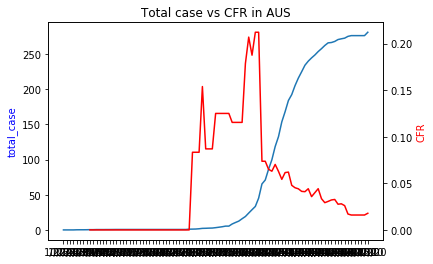

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Aus_total_case_per_day)
ax1.set_ylabel('total_case', color='b')

ax2 = ax1.twinx()
ax2.plot(Aus_CFR_per_day, 'r-')
ax2.set_ylabel('CFR', color='r')

plt.title('Total case vs CFR in AUS')
plt.show()

After the CFR dropped, the increase rate of total case decreased.

# 5. Data visualisation

In [56]:
At_least_50 = confirmed_cases_per_day[confirmed_cases_per_day["4/23/20"] >= 50]
At_least_50

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,714.0,784.0,840.0,906.0,933.0,996.0,1026.0,1092.0,1176.0,1279.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475.0,494.0,518.0,539.0,548.0,562.0,584.0,609.0,634.0,663.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2070.0,2160.0,2268.0,2418.0,2534.0,2629.0,2718.0,2811.0,2910.0,3007.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,659.0,673.0,673.0,696.0,704.0,713.0,717.0,717.0,723.0,723.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2277.0,2443.0,2571.0,2669.0,2758.0,2839.0,2941.0,3031.0,3144.0,3435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1165.0,1302.0,1349.0,1405.0,1490.0,1565.0,1627.0,1678.0,1716.0,1758.0
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,189.0,197.0,204.0,204.0,227.0,256.0,256.0,285.0,288.0,311.0
Vietnam,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,266.0,267.0,268.0,268.0,268.0,268.0,268.0,268.0,268.0,268.0


In [60]:
At_least_50["4/23/20"].sort_values(ascending=False).head(10) #there are 147 have confirm case>= 50 so the top ten countries are chosen to make the plot less messy.

Country/Region
US                869170.0
Spain             213024.0
Italy             189973.0
France            159460.0
Germany           153129.0
United Kingdom    139246.0
Turkey            101790.0
Iran               87026.0
China              83884.0
Russia             62773.0
Name: 4/23/20, dtype: float64

In [111]:
Top_ten_country = At_least_50["4/23/20"].sort_values(ascending=False).head(10).index.tolist()
Top_ten_country

['US',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'United Kingdom',
 'Turkey',
 'Iran',
 'China',
 'Russia']

In [112]:
comfirmed_dayzero = []
for i in Top_ten_country:
    comfirmed_dayzero.append(transposed_confirmed_cases_per_day[transposed_confirmed_cases_per_day[i]>=10].first_valid_index())

In [113]:
day_zero_top_ten = pd.DataFrame(list(zip(Top_ten_country, comfirmed_dayzero)), columns = ['country' , 'dayzero']) 
day_zero_top_ten

,country,dayzero
0,US,2/3/20
1,Spain,2/26/20
2,Italy,2/21/20
3,France,2/8/20
4,Germany,2/2/20
5,United Kingdom,2/24/20
6,Turkey,3/16/20
7,Iran,2/21/20
8,China,1/22/20
9,Russia,3/6/20


In [151]:
US_plot = normalised_confirmed_cases_per_day.loc["US","2/3/20":]
Spain = normalised_confirmed_cases_per_day.loc["Spain","2/26/20":]
Italy = normalised_confirmed_cases_per_day.loc["Italy","2/21/20":]
France = normalised_confirmed_cases_per_day.loc["France","2/8/20":]
Germany = normalised_confirmed_cases_per_day.loc["Germany","2/2/20":]
UK = normalised_confirmed_cases_per_day.loc["United Kingdom","2/24/20":]
Turkey = normalised_confirmed_cases_per_day.loc["Turkey","3/16/20":]
Iran = normalised_confirmed_cases_per_day.loc["Iran","2/21/20":]
China = normalised_confirmed_cases_per_day.loc["China","1/22/20":]
Russia = normalised_confirmed_cases_per_day.loc["Russia","3/6/20":]


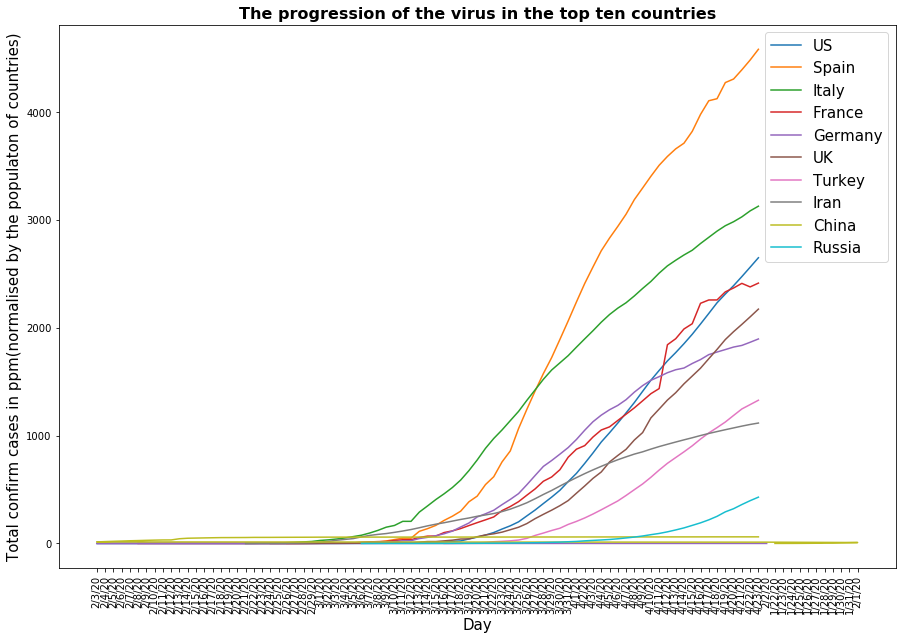

In [154]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(111)
ax1.plot(US_plot,label = "US"  )
ax1.plot(Spain,label = "Spain")
ax1.plot(Italy,label = "Italy"  )
ax1.plot(France,label = "France")
ax1.plot(Germany,label = "Germany"  )
ax1.plot(UK,label = "UK")
ax1.plot(Turkey,label = "Turkey"  )
ax1.plot(Iran,label = "Iran")
ax1.plot(China,label = "China"  )
ax1.plot(Russia,label = "Russia")




plt.xticks(rotation=90)
plt.legend(fontsize=15)
plt.title("The progression of the virus in the top ten countries", fontsize=16, fontweight='bold')
plt.xlabel("Day",fontsize=15)
plt.ylabel("Total confirm cases in ppm(normalised by the populaton of countries)",fontsize=15)
plt.show()